# DS1711 Project: Sentiment Analysis

## Part 3: Keras & LSTM

In this notebook you will learn how to use Keras to build a neural network as well as the LSTM

**Outline**:

- Keras
- RNN
- LSTM

*Some codes are adapted from [deeplearning.ai](https://www.deeplearning.ai/). Please do not use the code for ANY commercial use.*

Make sure you've installed the following packages:

- tensorflow
- keras
- nltk
- pandas
- h5py
- emoji

> If you're using `conda` as your package manager, you may noticed that `emoji` is not included in conda. To install it, you need to use `pip` instead:

> 1. Activate your virtual environment: `source activate <your_venv>`.
> 2. Verfiy that you're using `pip` along with the virtual environemnt: `which pip`.
> 3. Install the package by `pip install emoji`. (Do not use `pip3`! There will be only one `pip` version inside your virtual environment.)
> 4. Deactivate your virtual environment: `source deactivate` <your_venv>.

**Pipeline**

<img src="resources/pipeline.png" width="800px">

In [8]:
import tensorflow as tf

In [5]:
from ml_utils import *

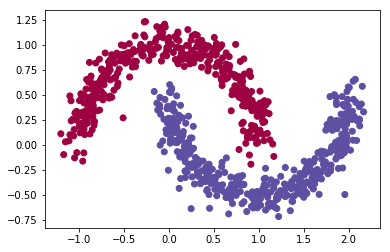

In [23]:
X_train, X_test, Y_train, Y_test = load_moon()
plt.scatter(X_train[0,:], X_train[1,:],c=Y_train[0],cmap=plt.cm.Spectral)

In [25]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation


** Steps of using Keras: **

1. Define the structure of the network. 
2. Print the summary of your network to see if shape and #of params is correct.
3. **Compile the model**.
4. Fit the model.
5. Evaluate the model.

In [24]:
X_train.shape

(2, 800)

In [25]:
X_train

array([[ 0.37622872,  0.79453915,  1.008904  , ...,  1.64374592,
         1.14039197,  0.35136571],
       [-0.34305422,  0.8358658 ,  0.38063811, ..., -0.29222335,
        -0.6045487 , -0.38779246]])

In [5]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))  # hidden layer
model.add(Dense(1, activation='sigmoid'))  # output layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


<img src="resources/keras_network.png" width="800">

<center>*Keras 2-layer neural network*</center>

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
X_train.T.shape

(132,)

In [28]:
X_train

array(['never talk to me again', 'I am proud of your achievements',
       'It is the worst day in my life', 'Miss you so much',
       'food is life', 'I love you mum', 'Stop saying bullshit',
       'congratulations on your acceptance',
       'The assignment is too long ', 'I want to go play',
       'she did not answer my text ', 'Your stupidity has no limit',
       'how many points did he score', 'my algorithm performs poorly',
       'I got approved', 'Stop shouting at me',
       'Sounds like a fun plan ha ha', 'no one likes him',
       'the game just finished', 'I will celebrate soon',
       'So sad you are not coming', 'She is my dearest love', 'Good job',
       'It was funny lol', 'candy is life ', 'The chicago cubs won again',
       'I am hungry', 'I am so excited to see you after so long',
       'you did well on you exam', 'lets brunch some day',
       'he is so cute', 'How dare you ask that',
       'do you want to join me for dinner ', 'I said yes',
       'she is 

In [8]:
model.fit(X_train.T, Y_train.T, epochs=100)

Epoch 1/100
800/800 [==============================] - 0s 274us/step - loss: 0.6247 - acc: 0.6962
Epoch 2/100
800/800 [==============================] - 0s 132us/step - loss: 0.6015 - acc: 0.7462
Epoch 3/100
800/800 [==============================] - 0s 125us/step - loss: 0.5785 - acc: 0.7787
Epoch 4/100
800/800 [==============================] - 0s 111us/step - loss: 0.5560 - acc: 0.7950
Epoch 5/100
800/800 [==============================] - 0s 204us/step - loss: 0.5337 - acc: 0.8100
Epoch 6/100
800/800 [==============================] - 0s 150us/step - loss: 0.5123 - acc: 0.8237
Epoch 7/100
800/800 [==============================] - 0s 106us/step - loss: 0.4912 - acc: 0.8400
Epoch 8/100
800/800 [==============================] - 0s 116us/step - loss: 0.4714 - acc: 0.8562
Epoch 9/100
800/800 [==============================] - 0s 124us/step - loss: 0.4528 - acc: 0.8675
Epoch 10/100
800/800 [==============================] - 0s 121us/step - loss: 0.4349 - acc: 0.8700
Epoch 11/100
800/80

In [9]:
model.evaluate(X_train.T, Y_train.T)

800/800 [==============================] - 0s 77us/step


[0.25398128896951677, 0.885]

In [10]:
model.evaluate(X_test.T, Y_test.T)

200/200 [==============================] - 0s 43us/step


[0.2799686527252197, 0.865]

<span style="color:red">**Notes:**</span>

Another good practice to create a model is to treat each layer as a "transformer" or a "function" that helps us to map the input (training features) to the output (labels).

In [11]:
def simple_nn_model():
    X = Input(shape=(2,))
    Z = Dense(4, activation='tanh')(X)
    Y = Dense(1, activation='sigmoid')(Z)
    return Model(inputs=X, outputs=Y)

In [12]:
model2 = simple_nn_model()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


### LSTM

> For more intuitive explanation of LSTM, you may refer to [this post](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

In [1]:
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation, Embedding
from keras.preprocessing import sequence

np.random.seed(1)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<img src="resources/deep_lstm.png" style="width:700px;height:400px;"> <br>
<caption><center> A 2-layer LSTM sequence classifier. </center></caption>

In [30]:
review = pd.read_csv('/Users/heyunyu/Desktop/DAL/NLP/senti_amazon.csv')

In [32]:
review.shape[0]*0.7

142453.5

In [26]:
X_train, X_test, Y_train, Y_test = load_emoji()

In [29]:
word_to_index, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

2 dictionaries are loaded:

- `word_to_index`: dictionary mapping from words to their indices in the vocabulary (400,001 words, with the valid indices ranging from 0 to 400,000).
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

The reason we need `word_to_index` is that when adding a custom embedding layer in Keras, we can only load the pretrained embedding as a matrix instead of a dictionary. A index will help us find the correct entry for a given word.

In [8]:
# Encode the sentence to the index array
X_tmp = np.array(["I like it"])
sentences_to_indices(X_tmp, word_to_index, max_len = 5)

array([[185457., 222471., 193716.,      0.,      0.]])

<span style="color:red">**Notes:**</span>: `sentences_to_indices` is provided in `ml_utils`.

#### Embedding Layer

We need to build a embedding matrix where each row represent a word vector.

In [9]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    Build and return a Keras Embedding Layer given word_to_vec mapping and word_to_index mapping
    
    Args:
        word_to_vec_map (dict[str->np.ndarray]): map from a word to a vector with shape (N,) where N is the length of a word vector (50 in our case)
        word_to_index (dict[str->int]): map from a word to its index in vocabulary

    Return:
        Keras.layers.Embedding: Embedding layer
    """
    
    # Keras requires vocab length start from index 1
    vocab_len = len(word_to_index) + 1  
    emb_dim = list(word_to_vec_map.values())[0].shape[0]
    
    # Initialize the embedding matrix as a numpy array of zeros of shape (vocab_len, dimensions of word vectors = emb_dim)
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    # Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    # Define Keras embedding layer with the correct output/input sizes, make it trainable. Use Embedding(...). Make sure to set trainable=False. 
    return Embedding(
        input_dim=vocab_len, 
        output_dim=emb_dim, 
        trainable=False,  # Indicating this is a pre-trained embedding 
        weights=[emb_matrix])

> For more information on how to define a pre-trained embedding layer in Keras, please refer to [this post](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html).

In [10]:
def emoji_model(input_shape, word_to_vec_map, word_to_index):
    """
    Build and return the Keras model
    
    Args:
        input_shape (np.ndarray): The shape of input layer, usually it means (#training_example, max_len)
        word_to_vec_map (dict[str->np.ndarray]): map from a word to a vector with shape (N,) where N is the length of a word vector (50 in our case)
        word_to_index (dict[str->int]): map from a word to its index in vocabulary
    
    Returns:
        Keras.models.Model: 2-layer LSTM model
    """
    
    # Input layer
    sentence_indices = Input(shape=input_shape, dtype='int32')
    
    # Embedding layer
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    embeddings = embedding_layer(sentence_indices)   
    
    # 2-layer LSTM
    X = LSTM(128, return_sequences=True, recurrent_dropout=0.5)(embeddings)  # N->N RNN
    X = Dropout(0.5)(X)
    X = LSTM(128, recurrent_dropout=0.5)(X)  # N -> 1 RNN
    X = Dropout(0.5)(X)
    X = Dense(1, activation='softmax')(X)
    
    # Create and return model
    model = Model(inputs=sentence_indices, outputs=X)
    
    return model

In [21]:
maxlen = len(max(X_train, key=len).split())
print(maxlen)

10


In [12]:
import tensorflow

In [13]:
tensorflow.__version__

'1.12.0'

In [16]:
import keras

In [17]:
keras.__version__

'2.1.2'

In [18]:
model = emoji_model((maxlen,), word_to_vec_map, word_to_index)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total para

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
# Convert training/testing features into index list
X_train_indices = sentences_to_indices(X_train, word_to_index, maxlen)
X_test_indices = sentences_to_indices(X_test, word_to_index, maxlen)

# Convert training/testing labels into one hot array
Y_train_oh = convert_to_one_hot(Y_train, C = 5)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)

In [15]:
history = model.fit(
    X_train_indices, 
    Y_train_oh, 
    epochs = 50, 
    batch_size = 32, 
    shuffle=True)

Epoch 1/50
132/132 [==============================] - 2s 18ms/step - loss: 1.5776 - acc: 0.2500
Epoch 2/50
132/132 [==============================] - 0s 1ms/step - loss: 1.5428 - acc: 0.3106
Epoch 3/50
132/132 [==============================] - 0s 1ms/step - loss: 1.5058 - acc: 0.3712
Epoch 4/50
132/132 [==============================] - 0s 1ms/step - loss: 1.4910 - acc: 0.3864
Epoch 5/50
132/132 [==============================] - 0s 1ms/step - loss: 1.4115 - acc: 0.4318
Epoch 6/50
132/132 [==============================] - 0s 1ms/step - loss: 1.3902 - acc: 0.4545
Epoch 7/50
132/132 [==============================] - 0s 1ms/step - loss: 1.3444 - acc: 0.4924
Epoch 8/50
132/132 [==============================] - 0s 1ms/step - loss: 1.2689 - acc: 0.4621
Epoch 9/50
132/132 [==============================] - 0s 1ms/step - loss: 1.2109 - acc: 0.5758
Epoch 10/50
132/132 [==============================] - 0s 1ms/step - loss: 1.1249 - acc: 0.5833
Epoch 11/50
132/132 [===========================

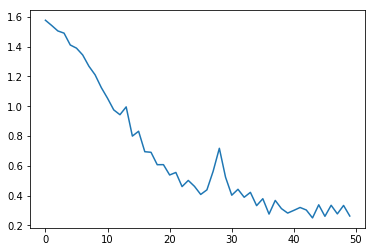

In [16]:
plt.plot(history.history['loss'])

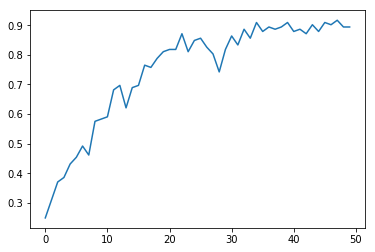

In [17]:
plt.plot(history.history['acc'])

In [18]:
loss, acc = model.evaluate(X_train_indices, Y_train_oh)
print('loss = %.4f, acc = %.2f%%' % (loss, acc * 100))

132/132 [==============================] - 0s 2ms/step
loss = 0.1288, acc = 96.21%


In [19]:
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print('loss = %.4f, acc = %.2f%%' % (loss, acc * 100))

56/56 [==============================] - 0s 291us/step
loss = 0.3134, acc = 87.50%


### Save & Load Model

Usually we will save the model structure and weights separately.

> This makes it easy to manage multiple versions of weights and you can always choose which version to go for production.

In [ ]:
import h5py

In [ ]:
# Save model structure
with open("emoji_model.json", "w") as fp:
    fp.write(model.to_json())

# Save model weights
model.save_weights("emoji_model.h5")

In [20]:
from keras.models import model_from_json

# Load model structure
with open("emoji_model_best.json", "r") as fp:
    model = model_from_json(fp.read())

# Load model weights
model.load_weights("emoji_model_best.h5")

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
loss, acc = model.evaluate(X_train_indices, Y_train_oh)
print('loss = %.4f, acc = %.2f%%' % (loss, acc * 100))

132/132 [==============================] - 0s 3ms/step
loss = 0.0002, acc = 100.00%


In [23]:
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print('loss = %.4f, acc = %.2f%%' % (loss, acc * 100))

56/56 [==============================] - 0s 250us/step
loss = 0.2815, acc = 92.86%


In [27]:
x_test = np.array(["i am feeling not happy"])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxlen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

i am feeling not happy 😞


### IMDB Dataset

In [ ]:
from keras.preprocessing import sequence
from keras.datasets import imdb

In [ ]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

In [ ]:
# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=80)
x_test = sequence.pad_sequences(x_test, maxlen=80)
x_train.shape

In [ ]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size = 32

model.fit(x_train, 
          y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

> In production, you should split your data into 3 parts: training data, validation data and test data. You should not feed `validation_data` with test data like we did here. This is only for quick test.

In [ ]:
# Save model structure
with open("imdb_model.json", "w") as fp:
    fp.write(model.to_json())

# Save model weights
model.save_weights("imdb_model.h5")

### TODO

- Use our pre-trained model to replace the Embedding layer and train the model for 30 epochs.
- Collect the training history data
- Plot the accuracy and loss
- Find the best epoch number to stop traning
- Retrain the model and save it for later use.


The model summary should be similar to:

```plain
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
embedding_34 (Embedding)     (None, None, 50)          20000050  
_________________________________________________________________
lstm_56 (LSTM)               (None, 128)               91648     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 129       
=================================================================
Total params: 20,091,827
Trainable params: 91,777
Non-trainable params: 20,000,050
_________________________________________________________________
```

The plot should be similar to:

<table>
    <tr>
        <td><img src="resources/acc.png"></td>
        <td><img src="resources/loss.png"></td>
    </tr>
</table>

### Answer

In [ ]:
model2 = Sequential()
model2.add(pretrained_embedding_layer(word_to_vec_map, word_to_index))
model2.add(LSTM(128, dropout=0.3, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

In [ ]:
model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 32

history = model2.fit(x_train, 
                     y_train,
                     batch_size=batch_size,
                     epochs=30,
                     validation_data=(x_test, y_test))

In [ ]:
h = history.history.copy()

In [ ]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])